<a href="https://colab.research.google.com/github/AHamamd150/Zewail-city/blob/main/DNN_HEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os # To use the system comands in python
import matplotlib.pyplot as plt # plotting library
import numpy as np  #Numerical python liberary
import pandas as pd #Data handeling python module 
plt.style.use('seaborn')

# Upload the input data files, Signal events and background events, from the github reporesitory 

In [ ]:
!git clone https://github.com/AHamamd150/Zewail-city.git


fatal: destination path 'Zewail-city' already exists and is not an empty directory.


# Create pandas data frames for the signal and background events

In [ ]:
columns=['dr','met','ptj1','etaj1','ptj2','etaj2','ptZ','etaZ']
bkg=pd.DataFrame(np.load('Zewail-city/data/bkg.npz',allow_pickle=True)['arr_0'].T,columns=columns)
sig=pd.DataFrame(np.load('Zewail-city/data/Signal.npz',allow_pickle=True)['arr_0'].T,columns=columns)

# Plot the distributions for both signal and background events

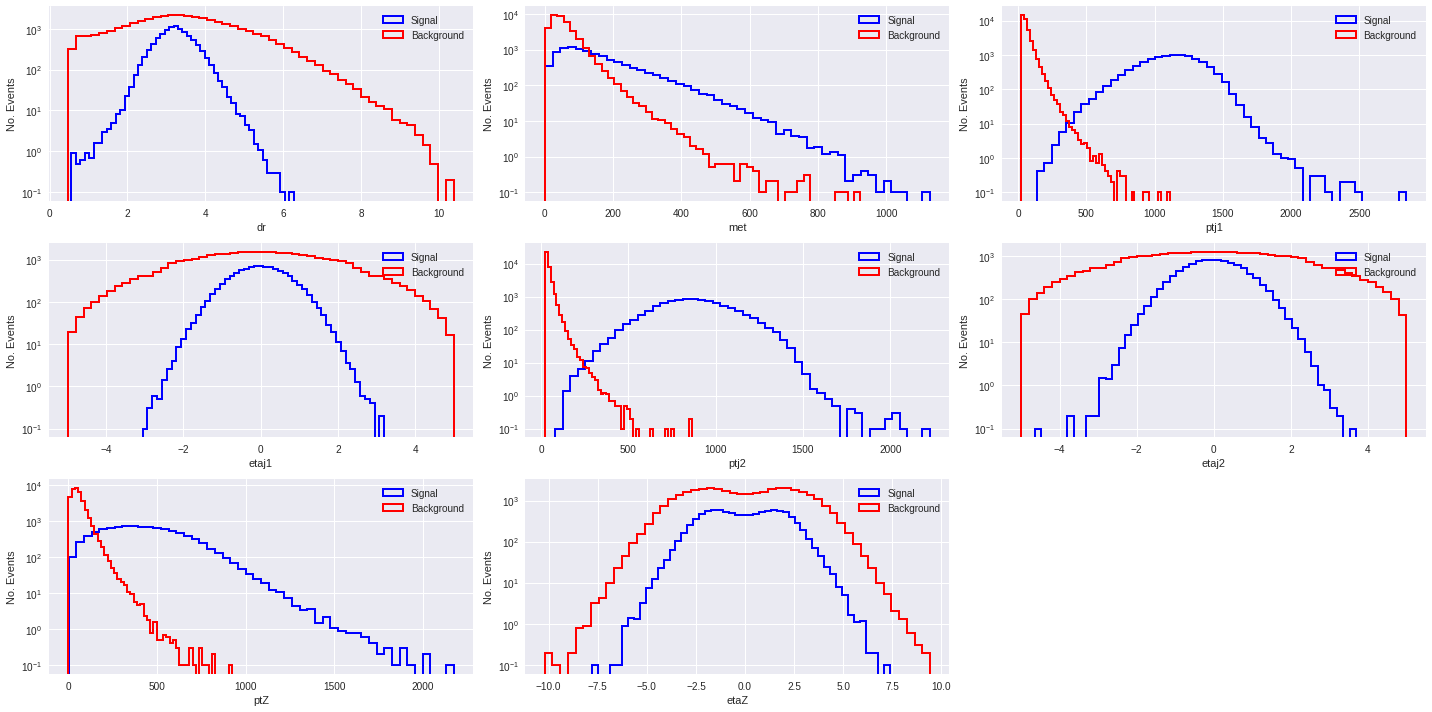

In [ ]:
signal_weight = 0.1 #weight of the signal events
bkg_weight = 0.1 # Weight of the background events
##########
fig= plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=1, wspace=1)
for q in range(8):
    y= fig.add_subplot(3,3,q+1)
    y.hist(sig.iloc[:,q],bins=50,fill=False,histtype='step',weights=np.ones(len((sig.iloc[:,q])))*signal_weight,log=True,label='Signal',linewidth=2,color='b');
    y.hist(bkg.iloc[:,q],bins=50,fill=False,histtype='step',weights=np.ones(len((bkg.iloc[:,q])))*bkg_weight,log=True,label='Background',linewidth=2,color='r');
    y.set_xlabel(columns[q]);
    y.set_ylabel('No. Events');
    plt.legend(loc='best',fontsize=10);
    plt.tight_layout()


# Create the labels for both events: 
* Signal events = 1 
* Background events =0

In [ ]:
sig['label']=np.ones(sig.shape[0])
bkg['label']=np.zeros(bkg.shape[0])

# Lets review the new structure of the data frame

In [ ]:
sig.describe()


,dr,met,ptj1,etaj1,ptj2,etaj2,ptZ,etaZ,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0
mean,3.237399,158.130634,1112.408083,-0.000799,872.574218,-0.004097,430.786999,-0.006620,1.0
std,0.465582,119.450914,222.333814,0.704068,209.266740,0.773628,224.734745,1.821447,0.0
min,0.556615,0.709585,136.850632,-3.051391,80.732620,-4.636335,1.426528,-7.787437,1.0
25%,2.947038,72.234446,969.634827,-0.475622,730.654114,-0.526337,260.049259,-1.492201,1.0
50%,3.222193,125.197388,1125.797302,-0.002252,865.115784,-0.007911,411.161180,-0.004667,1.0
75%,3.516401,211.250614,1268.322266,0.477874,1010.429794,0.521493,576.077651,1.479562,1.0
max,6.268378,1128.323608,2844.648193,3.195411,2226.788818,3.691093,2174.047040,7.369763,1.0


In [ ]:
bkg.describe()

,dr,met,ptj1,etaj1,ptj2,etaj2,ptZ,etaZ,label
count,363538.000000,363538.000000,363538.000000,363538.000000,363538.000000,363538.000000,363538.000000,363538.000000,363538.0
mean,3.417590,55.821291,61.911624,0.001944,39.917290,-0.000795,57.530081,0.000456,0.0
std,1.414178,40.669276,40.164466,1.789938,22.637677,2.039534,42.263337,2.536587,0.0
min,0.480385,0.056927,21.999060,-4.971225,21.506519,-4.996691,0.066216,-10.201164,0.0
25%,2.443980,29.099476,36.828659,-1.260940,26.591912,-1.504550,29.195293,-2.080701,0.0
50%,3.351200,46.727365,50.155485,0.000354,32.910166,0.003820,49.500018,0.003501,0.0
75%,4.313703,71.083107,72.918785,1.264447,44.845821,1.505724,73.911548,2.080745,0.0
max,10.376606,924.680359,1114.884277,4.985311,861.791016,4.993529,922.597712,9.415169,0.0


# The background data set is 3 times the signal data sets.. Lets down sample the background.

In [ ]:
bkg=bkg[:100000]
bkg.describe()

,dr,met,ptj1,etaj1,ptj2,etaj2,ptZ,etaZ,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0
mean,3.448965,51.942591,55.074165,-0.000952,36.026592,-0.001712,53.187096,-0.001795,0.0
std,1.440547,36.528609,32.665520,1.819365,16.933833,2.088945,37.495130,2.566893,0.0
min,0.493145,0.056927,21.999060,-4.930677,21.550459,-4.996691,0.097803,-10.201164,0.0
25%,2.441576,27.650385,34.504026,-1.277071,25.684290,-1.546527,27.511915,-2.107328,0.0
50%,3.371875,44.242655,45.597050,-0.003312,30.729938,0.003700,47.061879,-0.000205,0.0
75%,4.372322,66.498222,64.080013,1.275690,40.085725,1.549957,68.630740,2.094953,0.0
max,10.212399,860.566650,692.411743,4.974609,457.069916,4.993529,768.064722,9.415169,0.0


# Combine both data sets in one data frame 

In [ ]:
df = pd.concat([sig,bkg],ignore_index=True) 

# Split the data into train sample and test sample

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],stratify=df.iloc[:,-1],test_size=0.2)

# Lets look at the shapes of both train and test samples

In [ ]:
print('train sample shape= ',X_train.shape,' and test sample shape= ',X_test.shape)
print('train label shape= ',y_train.shape,'\t and test label shape= ',y_test.shape)

train sample shape=  (160000, 8)  and test sample shape=  (40000, 8)
train label shape=  (160000,) 	 and test label shape=  (40000,)


# Feature scaling:
* MinMax scaler : Normalize the data to 1 as $X_{new}=\frac{X-X_{min}}{X_{max}-X_{min}}$
* Standard scaler: Normalize your data as Z-score distributnion as $X_{new}=\frac{X-\mu}{\sigma}$

In [ ]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)


# Construct the sequential DNN model 

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(X_train.shape[1],)),
keras.layers.Dense(512,activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(265,activation='relu'),
keras.layers.Dropout(0.3),
keras.layers.Dense(128,activation='relu'),                         
keras.layers.Dropout(0.2),
keras.layers.Dense(1,activation='sigmoid') #Only one neuron while we have binary problem( Signal events or not)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 512)               4608      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 265)               135945    
                                                                 
 dropout_1 (Dropout)         (None, 265)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               34048     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

# Graph the model

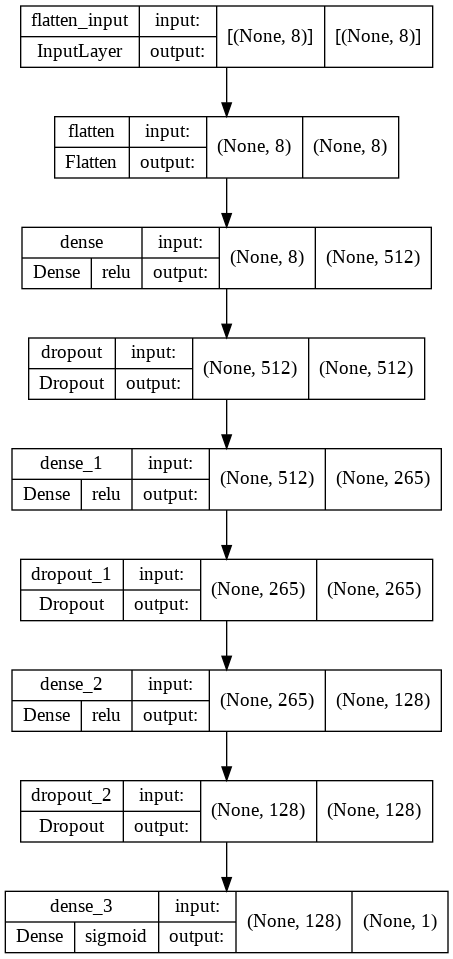

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_activations=True)

# Compile the model 

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

# Fit the training data to their labels

In [ ]:
history = model.fit(X_train,y_train,epochs=10,batch_size=1000,validation_split=0.2)

Epoch 1/10
128/128 [==============================] - 2s 9ms/step - loss: 0.0321 - accuracy: 0.9920 - val_loss: 0.0013 - val_accuracy: 0.9994
Epoch 2/10
128/128 [==============================] - 1s 6ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 6.8232e-04 - val_accuracy: 0.9998
Epoch 3/10
128/128 [==============================] - 1s 6ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 5.3821e-04 - val_accuracy: 0.9998
Epoch 4/10
128/128 [==============================] - 1s 7ms/step - loss: 8.9744e-04 - accuracy: 0.9997 - val_loss: 6.6388e-04 - val_accuracy: 0.9998
Epoch 5/10
128/128 [==============================] - 1s 7ms/step - loss: 9.1241e-04 - accuracy: 0.9997 - val_loss: 4.8439e-04 - val_accuracy: 0.9998
Epoch 6/10
128/128 [==============================] - 1s 6ms/step - loss: 8.9810e-04 - accuracy: 0.9998 - val_loss: 4.8969e-04 - val_accuracy: 0.9998
Epoch 7/10
128/128 [==============================] - 1s 6ms/step - loss: 7.5105e-04 - accuracy: 0.9998 - val_loss: 

# Evaluate the model

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.98%


# Plot the accuracy and the loss evolution 

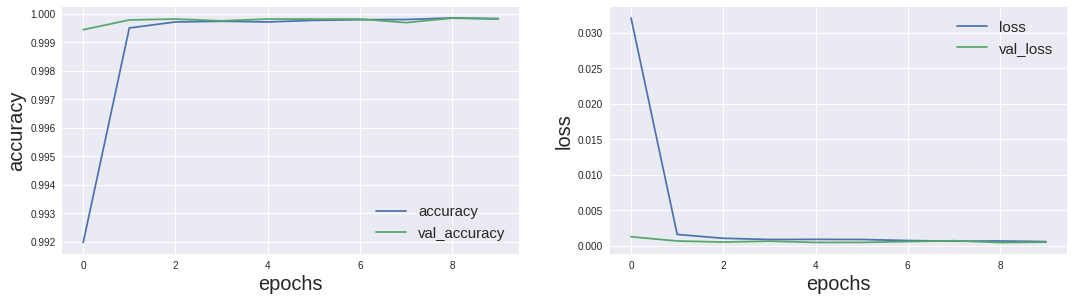

In [ ]:
fig=plt.figure(figsize=(18,10))
fig.add_subplot(2,2,1)
plt.plot(history.history['accuracy'],label='accuracy');
plt.plot(history.history['val_accuracy'],label='val_accuracy');
plt.xlabel('epochs',fontsize=20);
plt.ylabel('accuracy',fontsize=20);
plt.legend(loc='best',fontsize=15);
fig.add_subplot(2,2,2)
plt.plot(history.history['loss'],label='loss');
plt.plot(history.history['val_loss'],label='val_loss');
plt.xlabel('epochs',fontsize=20);
plt.ylabel('loss',fontsize=20);
plt.legend(loc='best',fontsize=15);

# Visulaize the ROC 

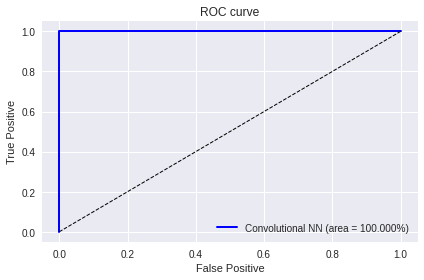

In [ ]:
from sklearn.metrics import auc,roc_curve
score=model.predict(X_test);
fpr, tpr, thresholds =roc_curve(y_test.ravel(),score.ravel());
auc = auc(fpr, tpr);
plt.plot(fpr,tpr,linewidth=2,color='b',label='Convolutional NN (area = {:.3f}%)'.format(auc*100));
plt.plot([0,1],[0,1],'k--',linewidth=1);
plt.xlabel('False Positive');
plt.ylabel('True Positive');
plt.title('ROC curve');
plt.tight_layout()
plt.legend();